# Import Datalib

In [1]:
%env KERAS_BACKEND = tensorflow
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from ipywidgets import interact_manual

env: KERAS_BACKEND=tensorflow


In [2]:
# NN related
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Dense, Activation,Input
from keras.optimizers import SGD, Adam

# Data
from keras.datasets import mnist

# Seperate Data
from keras.utils import to_categorical

from keras.layers import concatenate, add
from keras.layers.core import Lambda
from keras import backend as K

Using TensorFlow backend.


# Import Data

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [4]:
print("共 %d 訓練資料，每筆資料尺寸為%d X %d" %x_train.shape)

共 60000 訓練資料，每筆資料尺寸為28 X 28


# Deal with Data

In [5]:
x_train = x_train.reshape((60000,28*28))
x_test = x_test.reshape((10000,28*28))
x_train -= x_train.min()
x_train = x_train/x_train.max()

y_train_cate = to_categorical(y_train, 10)
y_test_cate = to_categorical(y_test, 10)

# Define Functional API
## 神經網路設計
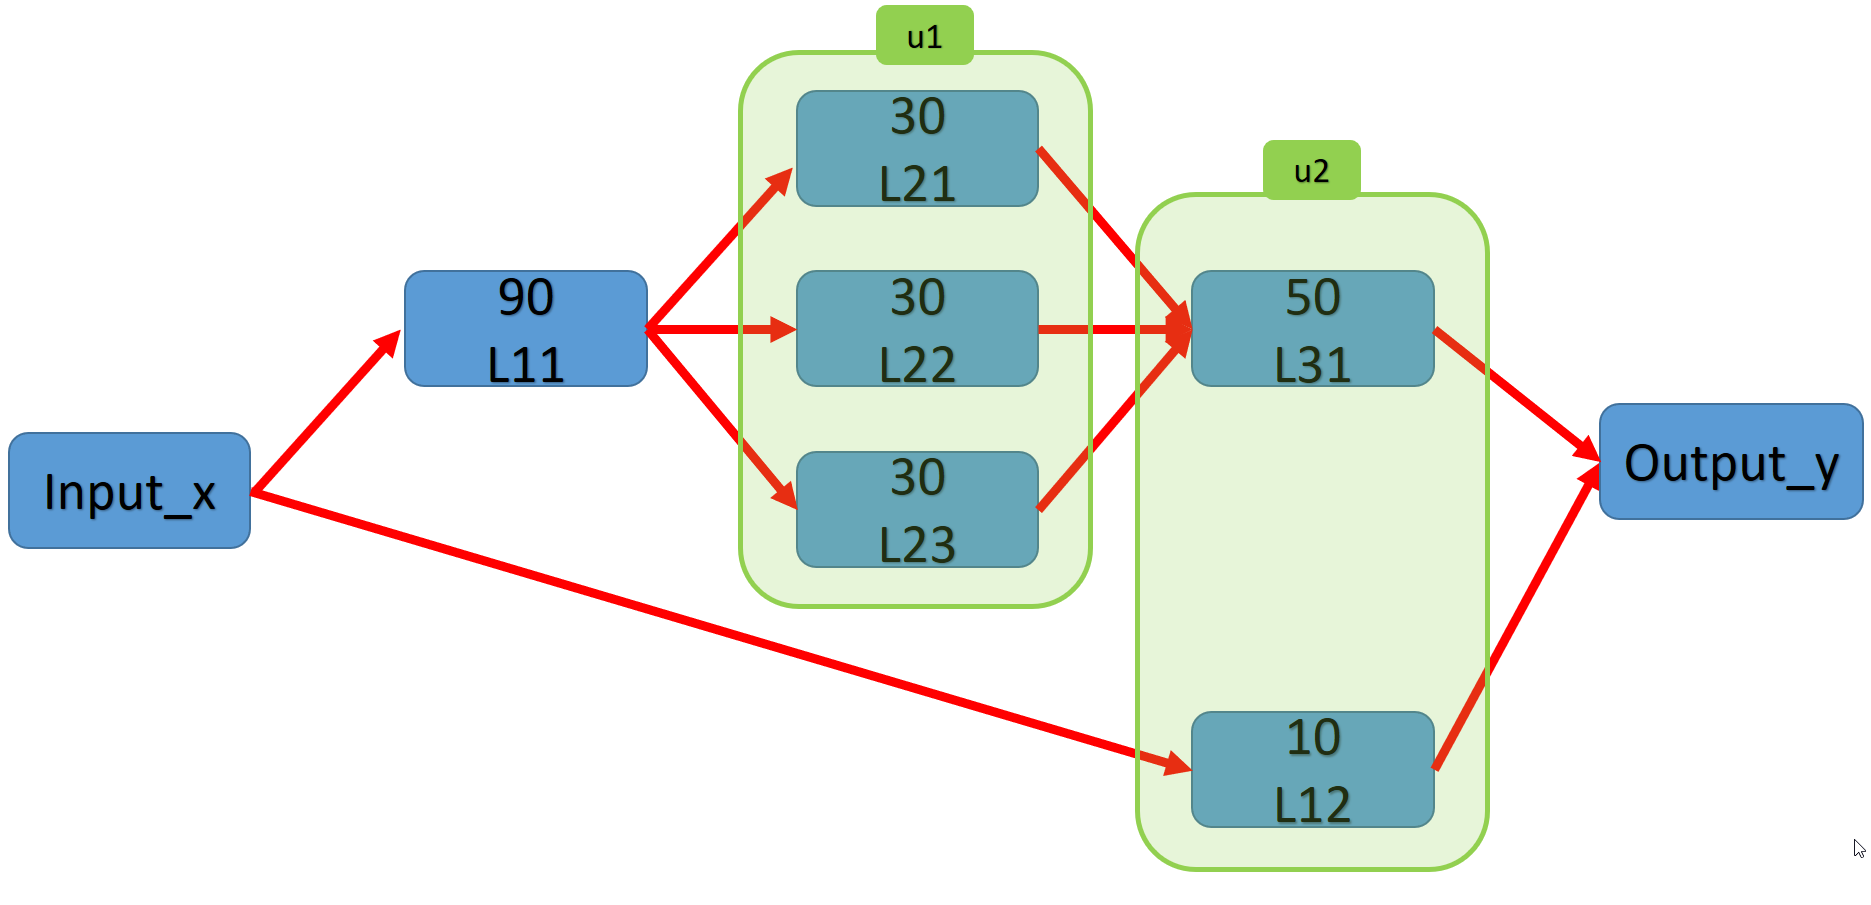

## 設計理念
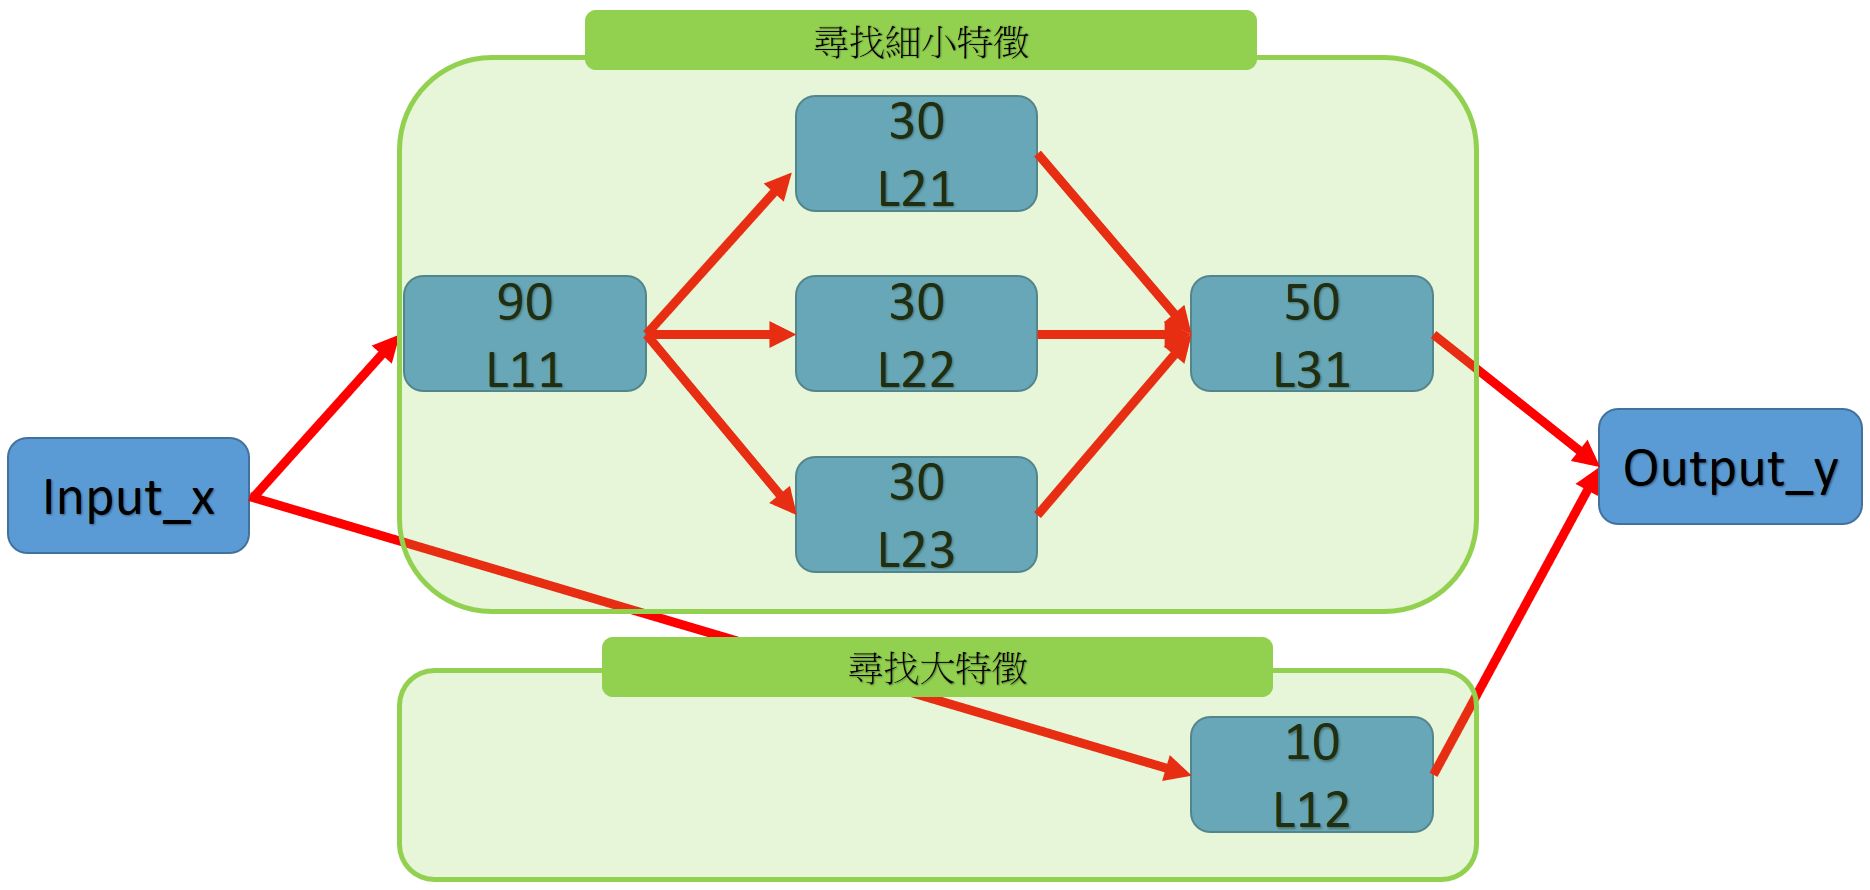
上方 layer 經過多節點，改變速率較小；下方 layer 經過少節點，改變速率較大。
因此可以再前期快速收斂，且後期也持續收斂。

In [6]:
x = Input(shape=(784,))

# Function
F_1 = Dense(90 , activation = "relu")

F_2 = Dense(30 , activation = "tanh")
F_3 = Dense(30 , activation = "softmax")
F_4 = Dense(30 , activation = "relu")

F_5 = Dense(50 , activation = "sigmoid")

F_6 = Dense(10 , activation = "sigmoid")

F_7 = Dense(10 , activation = "sigmoid")

# hiden layer
L_11 = F_1(x)

L_21 = F_2(L_11)
L_22 = F_3(L_11)
L_23 = F_4(L_11)
u1 = concatenate([L_21,L_22,L_23])

L_31 = F_5(u1)
L_12 = F_6(x)
u2 = concatenate([L_31,L_12])

y = F_7(u2)

In [7]:
model_num = Model(x,y)
#model_num.summary()

In [8]:
model_num.compile(optimizer="adam",loss = "categorical_crossentropy",metrics = ['acc'])
model_fit = model_num.fit(x_train, y_train_cate, batch_size=1000, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 2s 35us/step - loss: 1.8271 - acc: 0.5404
Epoch 2/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.8789 - acc: 0.8733
Epoch 3/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.4711 - acc: 0.9192
Epoch 4/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.3242 - acc: 0.9347
Epoch 5/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.2525 - acc: 0.9449
Epoch 6/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.2098 - acc: 0.9525
Epoch 7/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.1788 - acc: 0.9578
Epoch 8/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.1561 - acc: 0.9620
Epoch 9/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.1382 - acc: 0.9663
Epoch 10/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.1227 - acc: 0.9704

In [9]:
score_train = model_num.evaluate(x_train, y_train_cate, batch_size=400)
score_test = model_num.evaluate(x_test, y_test_cate, batch_size=400)
print('train_loss:',score_train[0],'train_accuracy:',score_train[1] )
print('test_loss:',score_test[0],'test_accuracy:',score_test[1] )

10000/10000 [==============================] - 0s 12us/step
train_loss: 0.04357868166019519 train_accuracy: 0.9908833420276641
test_loss: 0.13881660223007203 test_accuracy: 0.9629999971389771


# train_accuracy: 0.9908833420276641
# test_accuracy: 0.9629999971389771

<function matplotlib.pyplot.show(*args, **kw)>

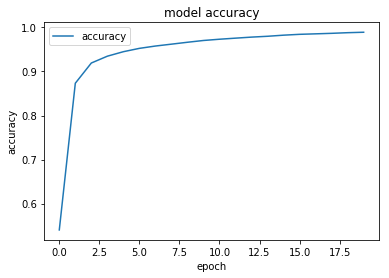

In [10]:
plt.plot(model_fit.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(["accuracy"],loc = "best")
plt.show

# 將 Model 持續進行訓練，觀看是否持續收斂。

In [11]:
model_num.compile(optimizer="adam",loss = "categorical_crossentropy",metrics = ['acc'])
model_fit = model_num.fit(x_train, y_train_cate, batch_size=1000, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.0448 - acc: 0.9897
Epoch 2/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.0383 - acc: 0.9910: 0s - loss: 0.0393 - acc: 0
Epoch 3/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.0343 - acc: 0.9919
Epoch 4/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.0308 - acc: 0.9927
Epoch 5/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.0286 - acc: 0.9928
Epoch 6/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.0249 - acc: 0.9943
Epoch 7/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.0232 - acc: 0.9947
Epoch 8/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.0202 - acc: 0.9958
Epoch 9/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.0180 - acc: 0.9966
Epoch 10/20
60000/60000 [==============================] - 1s 24us/step 

In [12]:
score_train = model_num.evaluate(x_train, y_train_cate, batch_size=400)
score_test = model_num.evaluate(x_test, y_test_cate, batch_size=400)
print('train_loss:',score_train[0],'train_accuracy:',score_train[1] )
print('test_loss:',score_test[0],'test_accuracy:',score_test[1] )

10000/10000 [==============================] - 0s 12us/step
train_loss: 0.00480713757686317 train_accuracy: 0.9995666670799256
test_loss: 0.1957044269144535 test_accuracy: 0.9522000050544739


# 結論：
### train_accuracy: 0.9908833420276641 --> 0.9995666670799256
### test_accuracy: 0.9629999971389771 --> 0.9522000050544739

### 訓練的準確率上升，但測試的準確率卻些微下降，表示有過擬合的現象，顯示的確有持續收斂的效果。